## I used Pandas to answer the following questions:

* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
* What is the average age of men?
* What is the percentage of people who have a Bachelor's degree?
* What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
* What percentage of people without advanced education make more than 50K?
* What is the minimum number of hours a person works per week?
* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
*What country has the highest percentage of people that earn >50K and what is that percentage?
Identify the most popular occupation for those who earn >50K in India.
Use the starter code in the file demographic_data_analyzer. Update the code so all variables set to "None" are set to the appropriate calculation or code. Round all decimals to the nearest tenth.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv(r'C:\Users\osakue\Desktop\PROJECT DATA\demographic data.csv')

In [5]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.shape

(32561, 15)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
 # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    
race_count = data['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

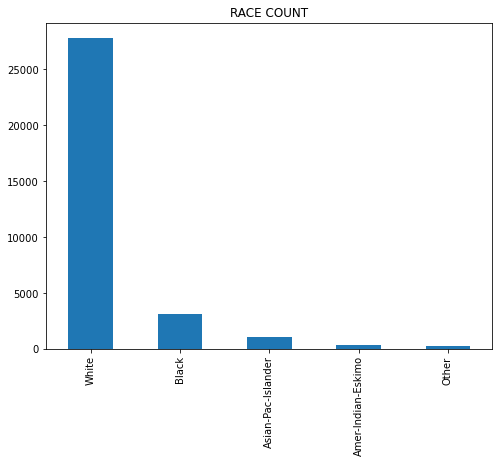

In [32]:
race_count.plot(kind='bar', figsize=(8,6), title= 'RACE COUNT');

In [17]:
 # What is the average age of men?
    
average_age_men = (data.groupby('sex')['age'].mean()['Male'])
print(average_age_men)

39.43354749885268


In [26]:
# What is the percentage of people who have a Bachelor's degree?

percentage_bachelors = data.groupby('education')['education'].value_counts()['Bachelors']/len(data)*100
percentage_bachelors

education
Bachelors    16.446055
Name: education, dtype: float64

In [29]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = data.loc[data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education = data.loc[~data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]


In [34]:
# percentage with salary >50K
higher_education_rich = 100.0 * (higher_education['salary'] == '>50K').sum() / len(data)
higher_education_rich

10.70605939621019

In [36]:
lower_education_rich = 100.0 * (lower_education['salary'] == '>50K').sum() / len(data)
lower_education_rich

13.374896348392248

In [38]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = data['hours-per-week'].min()
min_work_hours

1

In [43]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?

num_min_workers = data[data['hours-per-week'] == min_work_hours]
num_min_workers

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
1036,66,Self-emp-inc,150726,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,<=50K
1262,69,?,195779,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5590,78,?,363134,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5632,45,?,189564,Masters,14,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5766,62,?,97231,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5808,76,?,211574,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,<=50K
8447,67,?,244122,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
9147,75,?,260543,10th,6,Widowed,?,Other-relative,Asian-Pac-Islander,Female,0,0,1,China,<=50K
11451,27,Private,147951,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,1,United-States,<=50K


In [44]:
rich_percentage = 100.0 * (num_min_workers['salary'] == '>50K').sum() / len(data)
rich_percentage

0.0061423174963913885

In [46]:
# What country has the highest percentage of people that earn >50K?
highest_earning_country = None
highest_earning_country_percentage = None


In [49]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = data[(data['salary'] == '>50K') & (data['native-country'] == 'India')]['occupation'].value_counts().keys()[0]
top_IN_occupation

'Prof-specialty'